# House Price Predictor

### Plan Of Action
1. ### Explore Dateset

    a. Load datasets

    b. Check datasets for shape, data types, null values, and number of unique values
    
    c. check correlation of house price with expected important features
    
    d. check correlation with all features

2. ### Preprocess Data

    a. Delete features with more than 15% null values

    b. Deal with features less than 15% of null values

    c. Deal with outliers

    d. Check for target variable normality

    e. Identify top 10 features correlated to sales price

    f. Convert categorical features into binary columns using One Hot Encoding

    g. Create train test splits

    h. Standardize data

3. ### Model Creation

    a. Create a simple model (e.g, linear regression or decision tree regression)

    b. Create a ensemble model (Random Forest Regressor)

    c. Train and test model

4. ### Model optimization

    a. Consider techniques to optimize model
    
    b. Implement techniques if necessary

5. ### Predictions
    a. Preprocess test data

    b. Compute test house price predictions

    c. Create CSV of predictions with corresponding house Ids

### Import Libaries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

### Dealing With a split dataset

In [2]:
#load data
train_df = pd.read_csv("resources/train.csv")
test_df = pd.read_csv("resources/test.csv")
sample_df = pd.read_csv("resources/sample_submission.csv")

In [3]:
#check the shape of each df
print(f'train_df: {train_df.shape}')
print(f'test_df: {test_df.shape}')
print(f'sample_df: {sample_df.shape}')

train_df: (1460, 81)
test_df: (1459, 80)
sample_df: (1459, 2)


In [4]:
#check head of each df
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
sample_df.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [7]:
#Explore the dtypes, number of null values, and the number of unique values
train_info = pd.DataFrame({'dtypes': train_df.dtypes, '# of unique values': train_df.nunique(),
                         '# of null values': train_df.isnull().sum(), 'percentage of null values': train_df.isnull().sum()/len(train_df)})
train_info.head()

,dtypes,# of unique values,# of null values,percentage of null values
Id,int64,1460,0,0.000000
MSSubClass,int64,15,0,0.000000
MSZoning,object,5,0,0.000000
LotFrontage,float64,110,259,0.177397
LotArea,int64,1073,0,0.000000


We will check the correlation of the sales price column with expected columns that explain the variation of sales price.
LotArea, Neighborhood, HouseStyle, OverallQual, YearBuilt, KitchenQual, TotRmsAbvGrd, GrLivArea, GarageCars and YearBuilt

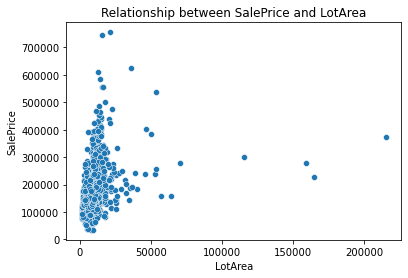

In [8]:
#Check relationship between SalePrice and LotArea
sb.scatterplot(data=train_df, y="SalePrice", x="LotArea")
plt.title("Relationship between SalePrice and LotArea")
plt.show()

No linear correlation here, on to the next. Checking OverallQual

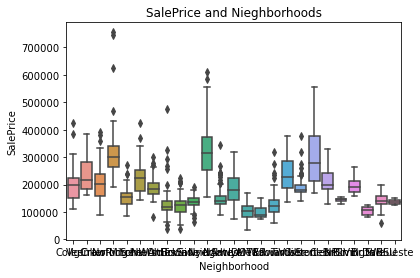

In [9]:
sb.boxplot(data = train_df, x = train_df["Neighborhood"], y = train_df["SalePrice"], orient = "v")
plt.title("SalePrice and Nieghborhoods")
plt.show()

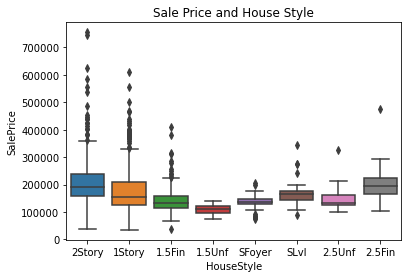

In [10]:
sb.boxplot(data= train_df, x = train_df["HouseStyle"], y = train_df["SalePrice"])
plt.title("Sale Price and House Style")
plt.show()

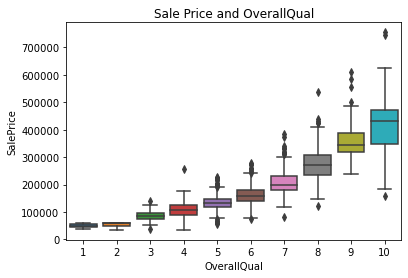

In [11]:
sb.boxplot(data= train_df, x = train_df["OverallQual"], y = train_df["SalePrice"])
plt.title("Sale Price and OverallQual")
plt.show()

A strong positive correlation. Intuitively the better the overall quality of the house the higher price the house will sell at.

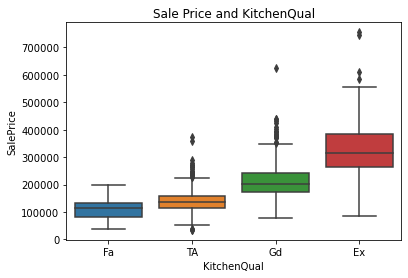

In [12]:
sb.boxplot(data= train_df, x = train_df["KitchenQual"], y = train_df["SalePrice"], order=["Fa", "TA", "Gd", "Ex"])
plt.title("Sale Price and KitchenQual")
plt.show()

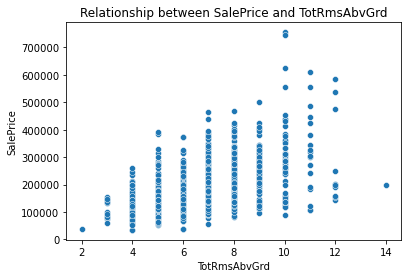

In [13]:
#Check relationship between SalePrice and TotRmsAbvGrd
sb.scatterplot(data=train_df, y="SalePrice", x="TotRmsAbvGrd")
plt.title("Relationship between SalePrice and TotRmsAbvGrd")
plt.show()

A low positive correlation here. It seems a house could have many rooms, but still be priced in the lower spectrum and vice versa.

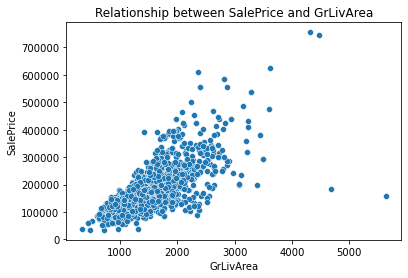

In [14]:
#Check relationship between SalePrice and GrLivArea
sb.scatterplot(data=train_df, y="SalePrice", x="GrLivArea")
plt.title("Relationship between SalePrice and GrLivArea")
plt.show()

Awesome! There is positive correlation here. There are 4 data points I'm concerned with. They are the houses with a GrLiveArea above 4000 sqft. The two with low sales price could be outliers. I'll deal with those later. 

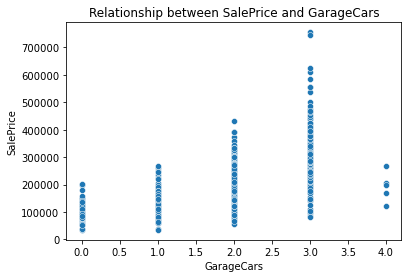

In [15]:
#Check relationship between SalePrice and GarageCars
sb.scatterplot(data=train_df, y="SalePrice", x="GarageCars")
plt.title("Relationship between SalePrice and GarageCars")
plt.show()

Weak positive correlation here. On to the next one 

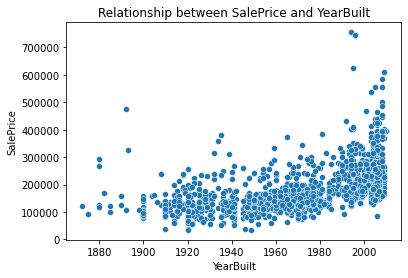

In [16]:
#Check relationship between SalePrice and YearBuilt
sb.scatterplot(data=train_df, y="SalePrice", x="YearBuilt")
plt.title("Relationship between SalePrice and YearBuilt")
plt.show()

And again..

It does seem like a slight correlation, but nothing to definitively say a new house will be solid at a higher price than a older house.

Now lets check the correlation among all features

<AxesSubplot:>

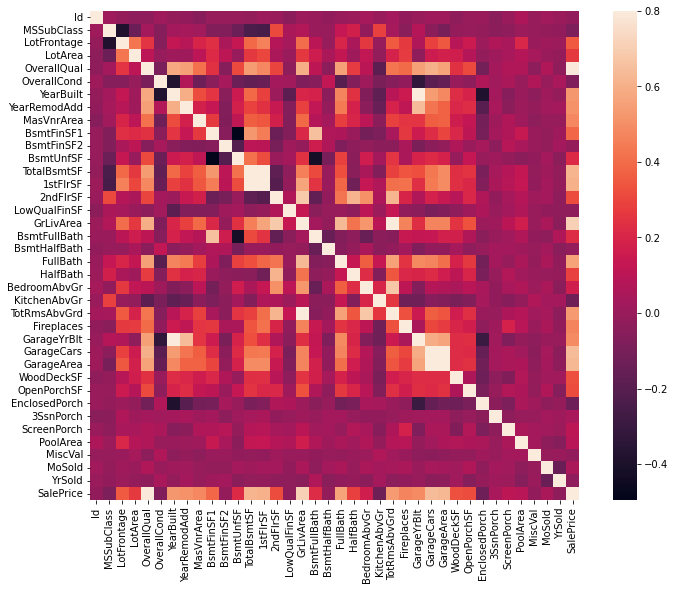

In [17]:
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sb.heatmap(corrmat, vmax=.8, square=True)

SalePrice is highly correlated with OverallQual, GrLiVArea, GarageCars/GarageArea. Moderatley correlated with Year Built, YearRemodAdd, Total BsmtSF, and FullBath

TotalBsmtSF and 1stFlrSF are highly correlated. GarageYrBlt, GarageCars, and GarageArea are highly correlated together. I could keep one feature that expresses the most important information about the general item while deleting the non essential/redundant features.

In [18]:
#check how many features have null values
train_info.sort_values(by= ["# of null values"], ascending=False)[:20]

,dtypes,# of unique values,# of null values,percentage of null values
PoolQC,object,3,1453,0.995205
MiscFeature,object,4,1406,0.963014
Alley,object,2,1369,0.937671
Fence,object,4,1179,0.807534
FireplaceQu,object,5,690,0.472603
LotFrontage,float64,110,259,0.177397
GarageYrBlt,float64,97,81,0.055479
GarageCond,object,5,81,0.055479
GarageType,object,6,81,0.055479
GarageFinish,object,3,81,0.055479


### Dealing With Null Values

There are 19 collumns that have null values. I will delete any column with more than 15% percent of null values. Columns "PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQU", and "LotFrontage" have to many null values for me to try any tricks to fill the missing data.

From the remaining 13 features, there are two groups of features with the same amount of null values. After looking at each group, they express information about the garage or the basement. Some features seem redundent because the information is expressed through one key feature. Using GarageCars it expresses most important information about the garage, so we dont need the other features. This applies to basements as well.

We will also consider MasVnr columns as non essential and remove them as well. As for the Electrical column we will remove the row with a null value.

In [19]:
columns = train_info.loc[(train_info["# of null values"] > 1), :]
train_df = train_df.drop(axis=1, columns=columns.index)
train_df.shape

(1460, 63)

Once again, GarageCars and GarageArea explain the same information about the house. GC is the size of the garage in car capacity and GA is the size of the garage in square feet. For this reason, I will remove GarageArea from dataframe.

In [20]:
train_df = train_df.drop(axis=1, columns=["GarageArea"])

In [21]:
#delete row in electrical column with null value
train_df = train_df.dropna()
train_df.shape

(1459, 62)

### Dealing with Outliers

As we identified earlier through the scatter plot between SalePrice and GrLivArea there are two outlier points. So we will remove them now.

In [22]:
train_df.loc[(train_df["GrLivArea"] > 4500), :]

#results: Index = [523, 1298]

train_df = train_df.drop(axis=0, index=[523, 1298])

### Checking target variable for normality

Making sure our target variable is normal will be helpful in developing an accurate regression model. If SalePrice is not normal we can enforce normality through transformation.

We will just transform it back once we have our prediction values. 

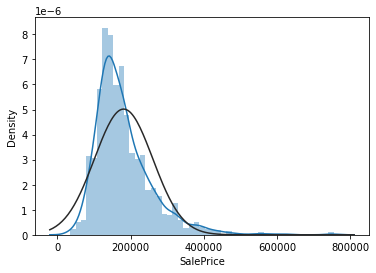

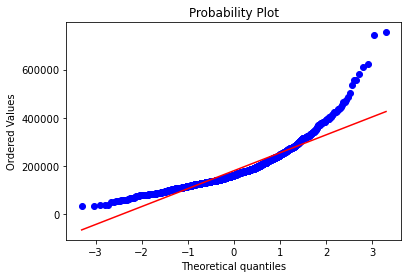

In [23]:
from scipy.stats import norm
from scipy import stats

sb.distplot(train_df["SalePrice"], fit=norm)
fig = plt.figure()
res = stats.probplot(train_df["SalePrice"], plot = plt)

SalePrice is not normal. It shows a normal distribution skewed to the right. 

Now we will transform SalePrice to enforce normality.

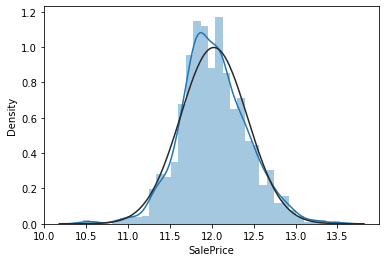

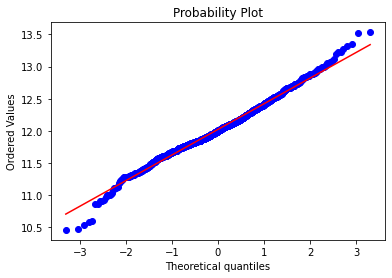

In [24]:
train_df["SalePrice"] = np.log(train_df["SalePrice"])
sb.distplot(train_df["SalePrice"], fit=norm)
fig = plt.figure()
res = stats.probplot(train_df["SalePrice"], plot=plt)

Awesome! We have normality in our target variable

### Create a model with the top 10 features correlated with Salesprice

In [25]:
sp_corr = train_df.corr()[-1:]
sp_corr = np.transpose(sp_corr)

In [26]:
sp_corr = sp_corr.sort_values(by = ["SalePrice"], ascending = False)

top_ten_corr = sp_corr[:11]

top_ten_corr

,SalePrice
SalePrice,1.000000
OverallQual,0.821589
GrLivArea,0.725226
GarageCars,0.681053
TotalBsmtSF,0.648154
1stFlrSF,0.620761
FullBath,0.596021
YearBuilt,0.587301
YearRemodAdd,0.566208
TotRmsAbvGrd,0.537716


In [27]:
final_train_df = train_df[top_ten_corr.index.tolist()]
final_train_df.head()


,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,1stFlrSF,FullBath,YearBuilt,YearRemodAdd,TotRmsAbvGrd,Fireplaces
0,12.247694,7,1710,2,856,856,2,2003,2003,8,0
1,12.109011,6,1262,2,1262,1262,2,1976,1976,6,1
2,12.317167,7,1786,2,920,920,2,2001,2002,6,1
3,11.849398,7,1717,3,756,961,1,1915,1970,7,1
4,12.429216,8,2198,3,1145,1145,2,2000,2000,9,1


### Create train test splits

In [28]:
#create my x and y variables
y = final_train_df["SalePrice"]
x = final_train_df.drop(axis=1, columns=["SalePrice"])

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

### Standardize Data

In [30]:
#To standardize data I will use Sklearns StandardScaler
scaler = StandardScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

Create and Test Decision Tree Regressor

In [31]:
dtr = DecisionTreeRegressor().fit(x_train_scaled, y_train)

In [32]:
print(f' DecisionTreeRegressor Train Score: {dtr.score(x_train_scaled, y_train)}')
print(f' DecisionTreeRegressor Test Score: {dtr.score(x_test_scaled, y_test)}')

 DecisionTreeRegressor Train Score: 0.9999014353451229
 DecisionTreeRegressor Test Score: 0.6772159813262992


Awesome start! Now lets see how an random forest regressor preforms.

Create Random Forest Regressor

In [33]:
rfr = RandomForestRegressor().fit(x_train_scaled, y_train)

In [34]:
print(f' Random Forest Train Score: {rfr.score(x_train_scaled, y_train)}')
print(f' Random Forest Test Score: {rfr.score(x_test_scaled, y_test)}')

 Random Forest Train Score: 0.9797220983636993
 Random Forest Test Score: 0.8478292471083178


Even Better! A 84.5% accuracy score! Lets see if I add more features will my accuracy score increase.

### Optimize Random Forest Regression Model

In [35]:
top_fifteen = sp_corr[:16]
fifteen_df = train_df[top_fifteen.index.tolist()]

#set x and y for test train spilt
y2 = fifteen_df["SalePrice"]
x2 = fifteen_df.drop(axis=1, columns=["SalePrice"])

In [36]:
#create train test spilt
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, random_state=42)

#To standardize data I will use Sklearns StandardScaler
scaler2 = StandardScaler().fit(x2_train)
x2_train_scaled = scaler2.transform(x2_train)
x2_test_scaled = scaler2.transform(x2_test)

In [37]:
rfr2 = RandomForestRegressor(n_estimators=100, max_depth=None).fit(x2_train_scaled, y2_train)
print(f' Optimized Random Forest Train Score: {rfr2.score(x2_train_scaled, y2_train)}')
print(f' Optimized Random Forest Test Score: {rfr2.score(x2_test_scaled, y2_test)}')

 Optimized Random Forest Train Score: 0.9818193320549105
 Optimized Random Forest Test Score: 0.8693853309301484


woo hoo! Even Better!

Now that I have a model with an acceptable accuracy score, I will use it to predict the house prices for the original test dataset.

### Next Steps
1. Compute predicted house prices for initial test_df.
2. Create csv of predictions with corresponding id numbers. 
3. Create ReadMe, add supplemental visualizaitons
4. Write up median post about what I learned. 

In [38]:
#initial test dataframe
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


We will repeat the steps done above. Remove columns with 15% or more null values and redudant columns with information expressed elsewhere. 

In [39]:
#Explore the dtypes, number of null values, and the number of unique values
test_info = pd.DataFrame({'dtypes': test_df.dtypes, '# of unique values': test_df.nunique(),
                         '# of null values': test_df.isnull().sum(), 'percentage of null values': test_df.isnull().sum()/len(test_df)})
test_info

,dtypes,# of unique values,# of null values,percentage of null values
Id,int64,1459,0,0.000000
MSSubClass,int64,16,0,0.000000
MSZoning,object,5,4,0.002742
LotFrontage,float64,115,227,0.155586
LotArea,int64,1106,0,0.000000
...,...,...,...,...
MiscVal,int64,26,0,0.000000
MoSold,int64,12,0,0.000000
YrSold,int64,5,0,0.000000
SaleType,object,9,1,0.000685


In [40]:
#check how many features have null values
test_info.sort_values(by= ["# of null values"], ascending=False)[:20]

,dtypes,# of unique values,# of null values,percentage of null values
PoolQC,object,2,1456,0.997944
MiscFeature,object,3,1408,0.965045
Alley,object,2,1352,0.926662
Fence,object,4,1169,0.801234
FireplaceQu,object,5,730,0.500343
LotFrontage,float64,115,227,0.155586
GarageYrBlt,float64,97,78,0.053461
GarageQual,object,4,78,0.053461
GarageFinish,object,3,78,0.053461
GarageCond,object,5,78,0.053461


In [41]:
#dropped columns with null values above 15% and redundant columns 
columns = test_info.loc[(test_info["# of null values"] > 5), :]
test_df = test_df.drop(axis=1, columns=columns.index)
test_df.shape

(1459, 62)

In [42]:
test_df = test_df.drop(axis=1, columns=["GarageArea"])

#delete rows in columns with few null value
test_df = test_df.dropna()
test_df.shape

(1447, 61)

In [43]:
#filter dataset to only top 15 features highly correlated to SalePrice
test_top_fifteen = top_fifteen.drop(axis = 0, index=["SalePrice"])
test_top_fifteen

,SalePrice
OverallQual,0.821589
GrLivArea,0.725226
GarageCars,0.681053
TotalBsmtSF,0.648154
1stFlrSF,0.620761
FullBath,0.596021
YearBuilt,0.587301
YearRemodAdd,0.566208
TotRmsAbvGrd,0.537716
Fireplaces,0.492159


In [44]:
#confirm
final_test_df = test_df[test_top_fifteen.index.tolist()]
final_test_df.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,1stFlrSF,FullBath,YearBuilt,YearRemodAdd,TotRmsAbvGrd,Fireplaces,BsmtFinSF1,WoodDeckSF,OpenPorchSF,2ndFlrSF,HalfBath,LotArea,BsmtFullBath,BsmtUnfSF,BedroomAbvGr,ScreenPorch
0,5,896,1.0,882.0,896,1,1961,1961,5,0,468.0,140,0,0,0,11622,0.0,270.0,2,120
1,6,1329,1.0,1329.0,1329,1,1958,1958,6,0,923.0,393,36,0,1,14267,0.0,406.0,3,0
2,5,1629,2.0,928.0,928,2,1997,1998,6,1,791.0,212,34,701,1,13830,0.0,137.0,3,0
3,6,1604,2.0,926.0,926,2,1998,1998,7,1,602.0,360,36,678,1,9978,0.0,324.0,3,0
4,8,1280,2.0,1280.0,1280,2,1992,1992,5,0,263.0,0,82,0,0,5005,0.0,1017.0,2,144


In [45]:
#create scaler and transform test data
scaler2 = StandardScaler().fit(final_test_df)
test_scaled = scaler2.transform(final_test_df)

In [46]:
#Compute sale prices for test data using best performing model. In this case rfr2
y_pred = rfr2.predict(test_scaled)

#transform data to actual scale of home prices 
y_final = np.exp(y_pred)

In [47]:
#create dataframe with house id and predicted sales price
pred_df = pd.DataFrame({"Id": test_df["Id"], "Predicted Sales Price": y_final})

pred_df.to_csv("predicted_house_prices.csv", index=False)

In [48]:
pred_df.head()

,Id,Predicted Sales Price
0,1461,131191.561676
1,1462,150324.768572
2,1463,183679.544854
3,1464,180828.806000
4,1465,180003.116314


Thank you for taking the time and looking at my notebook. I learned alot through this comeptition hosted by Kaggle and from other particapants. I will post or have posted on Medium, depending on when you are reading this, a article on what I learned throughtout the process. The link will be in my ReadMe File for this project. Have a wonderful day!